# Profit Analysis for Investment in Different Departments

Collected these datasets from Kaggle(https://www.kaggle.com/code/syedmuhammadebad/startups-profits-prediction) & I will use Exploratory Data Analysis to see which department investment led to maximum profit.
We will use this information for future investment

## Import Dataset

In [94]:
# Importing relevant Python libraries to do our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [96]:
# Now I am loading data set using  pandas 

profit_data = pd.read_csv('Profit prediction based on investment.csv')

In [397]:
# Let's check first 7 rows of our data sets

profit_data.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [399]:
profit_data.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [401]:
# Let's check last 7 rows of our data sets

profit_data.tail(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [98]:
#  Let's change the heading of the column

profit_data.rename(columns={'R&D Spend':'RD_Expense','Administration':'Admin_Expense',
                            'Marketing Spend':'Marketing_Expense','State':'Company_Location','Profit':'Profit_Value'},inplace=True)

# Let's check the data frame with revised columns heading
profit_data.head(7)

,RD_Expense,Admin_Expense,Marketing_Expense,Company_Location,Profit_Value
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


##  Exploratory Data Analysis

In [405]:
# Let's check some quick information about  datasets

profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RD_Expense         50 non-null     float64
 1   Admin_Expense      50 non-null     float64
 2   Marketing_Expense  50 non-null     float64
 3   Company_Location   50 non-null     object 
 4   Profit_Value       50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


__Insights:__

-  No null value present in this datasets
-  One categorical & four numerical datatype present in this data sets
-  Only 2.1 KB  ram memory used by this datasets

In [407]:
# Let's check the statistical summary of these data sets to see how spread the data is

profit_data.describe()

,RD_Expense,Admin_Expense,Marketing_Expense,Profit_Value
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


__Insights__

- As Count for all numerical column is 50, it means there is no missing value
- Some company didn't invest in research & development but All company invested in Adminstration department
- Found maximum data spread for marketing variable

In [461]:
# Let's check the statistical summary of these data sets to see how spread the data is

profit_data.describe(include='object')

,Company_Location
count,50
unique,3
top,New York
freq,17


__Insights__

* Found all companies are located in 3 states
* Maximum company are in New York state, the number is 17 

## Relationship between profit & investment on different departments by individual scatter plot

In [100]:
def scatter_plot_relationship(x_value,x_label):
    
    """
    Create a scatter plot putting profit value on the y-axis 
    & investment in different departments on the x-axis
    """
    
    plt.figure(figsize=(6,5),dpi=144)
    X = x_value/1000
    Y = profit_data['Profit_Value']/1000

    plt.scatter(x=X ,y=Y, color= '#f6684a',alpha=1)

    plt.annotate(f"{x_label}:-\n Mean : {np.mean(X):.2f}K\n Median: {np.median(X):.2f}K\n Std Dev: {np.std(X):.2f}K",
                 xy =(0.03,0.8),
                 xycoords='axes fraction',
                 fontsize=10, 
                 color='black',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey",alpha=0.3))

    # Giving label & title to make it easier for the reader
    plt.xlabel(f"{x_label} (in K)",fontsize=12) #  Used formatted string to dynamically insert the x_label value
    plt.ylabel("Profit_Value (in K)",fontsize=12)
    plt.title(f'Profit vs {x_label}',fontsize=12)
    
    # Setting xticks & yticks in nicer way reducing number of zeros & changing last 000 in K
    plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(nm)}K' for nm in plt.xticks()[0]])
    plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(nm)}K' for nm in plt.yticks()[0]])
    
    #Setting limit to avoid unnecessary  space
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.grid(c='green',linestyle='--', linewidth=1,alpha=0.3)  
    plt.tight_layout()
    plt.show()
    return

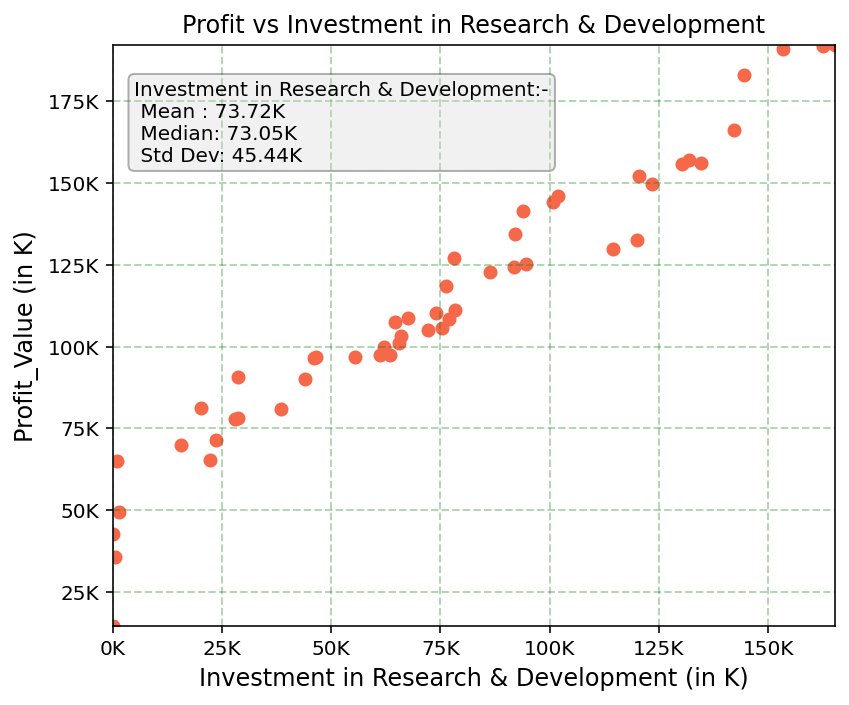

<Figure size 640x480 with 0 Axes>

In [102]:
scatter_plot_relationship(profit_data['RD_Expense'],'Investment in Research & Development')
plt.savefig('Investment in Research & Development.png')

__Insight:__

The data points in this Scatter plot trends upward from left to right.So,I can say that there is a positive correlation between profit & investment in research & development.Also I found zero profit or  minimum profit i.e: less than 75000 only in case of no investment in R&D. Furthermore, the mean & median are 73.72k & 73.05K accordingly which indicates data distribution is normal & no outlier. Based on this representation, I can say if we invest more on R&D , business profit will be increased

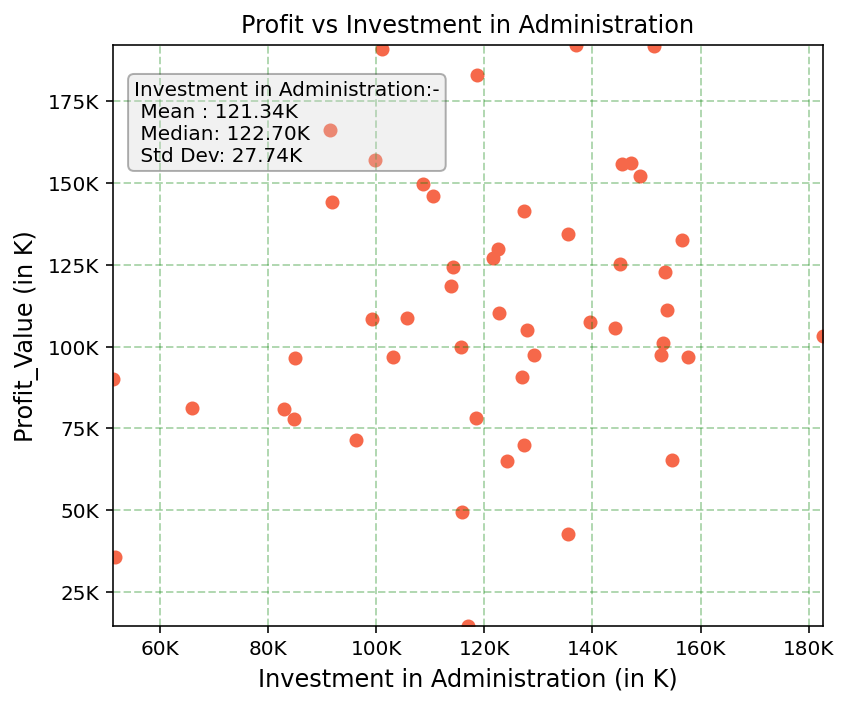

<Figure size 640x480 with 0 Axes>

In [104]:
scatter_plot_relationship(profit_data['Admin_Expense'],'Investment in Administration')
plt.savefig('Investment in Administration.png')

__Insights:__

It is visible that the data points in the scatter plot display a random distribution, implying an absence of a significant linear relationship.
Although the mean is 121.34 K & median is 122.70K almost similar which indicates data distribution normal

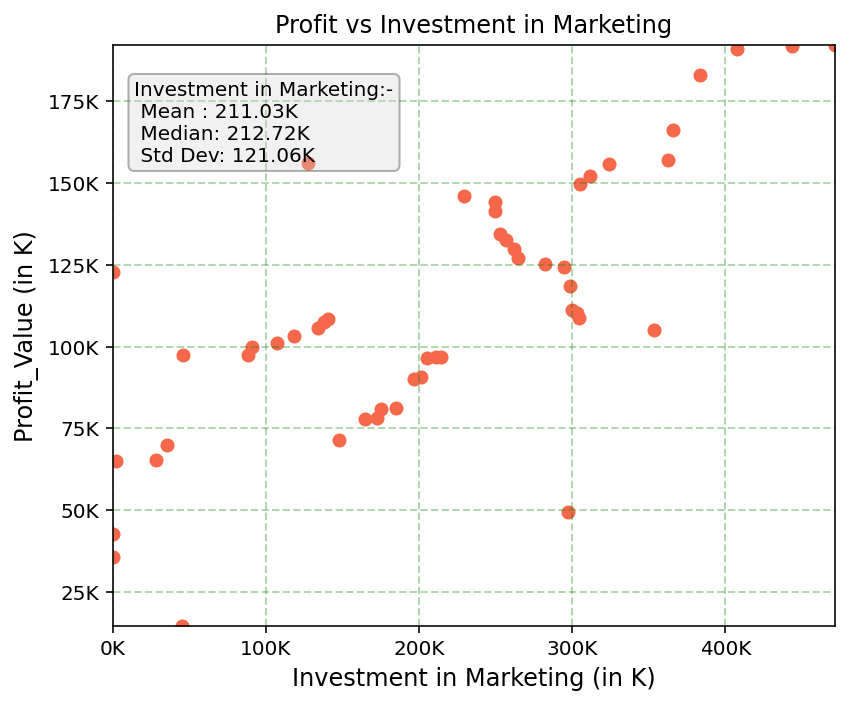

<Figure size 640x480 with 0 Axes>

In [106]:
scatter_plot_relationship(profit_data['Marketing_Expense'],'Investment in Marketing')
plt.savefig('Investment in Marketing.png')

__Insights:__

It is also visible that the data points in the scatter plot display a random distribution, implying an absence of a significant linear relationship.
Although the mean is 211.03 K & median is 212.72K almost similar which indicates data distribution normal & absence of outlier 

## Correlation Matrix of Profit & Investment in Different Departments

In [108]:
def plot_price_correlation(df, method):
    """
    Plot correlation among profit & 
    investment in different departments with different methods
    """
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(6,5),dpi=144)

    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='YlOrRd', annot=True,mask=mask)
    plt.title(f'Correlation Matrix of Profit & Investment in Different Departments by {method.capitalize()} Method',fontsize=10)
    plt.xticks(rotation=20,fontsize=10)
    plt.yticks(rotation=0,fontsize=10)
    plt.show()
    return

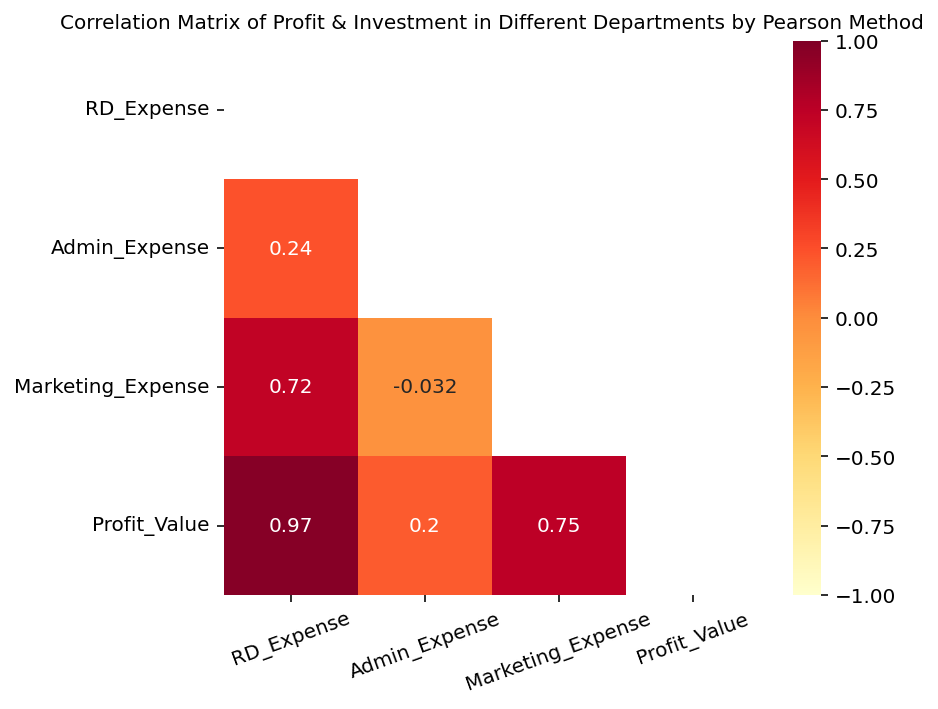

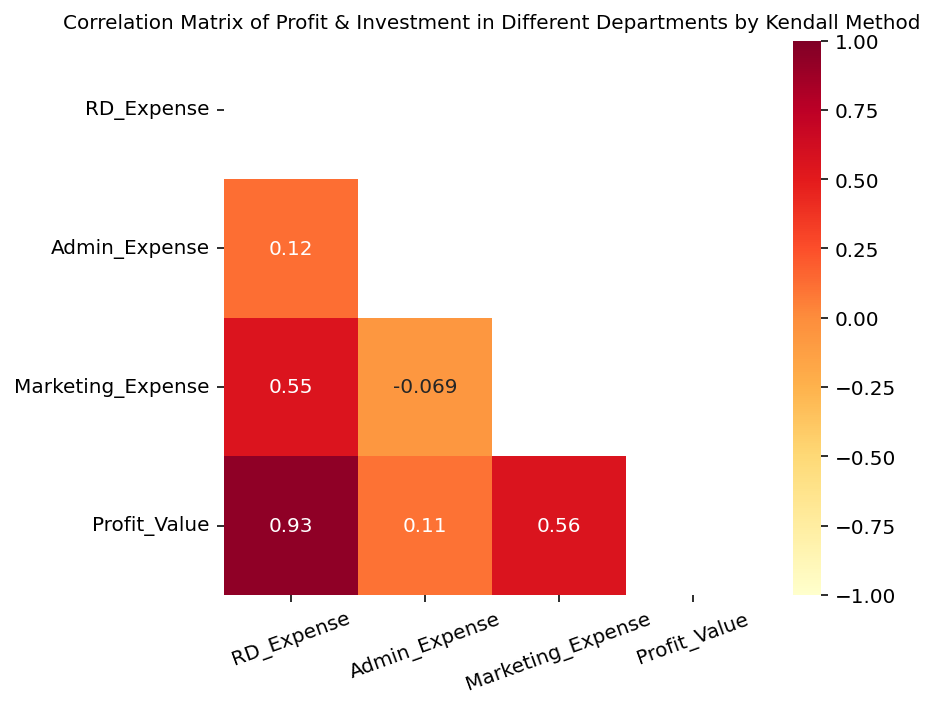

<Figure size 640x480 with 0 Axes>

In [110]:
plot_price_correlation(profit_data.drop('Company_Location',axis=1), 'pearson')
plot_price_correlation(profit_data.drop('Company_Location',axis=1), 'kendall')
plt.savefig('Heatmap.png')

__Insights:__

Heatmaps from both methods show a high correlation between profit value & investment in research & development while it is very minimal for investment in marketing and has no correlation with investment in administration. Also I found no two variable highly correlated that I can remove one variable.

## Comparison of Profit Percentage Among Different Company Location

In [116]:
def plot_location_pie(df_loc,labels):
    """
    Plots sum of profit  company location wise
    """
    print(plt.pie(df_loc,labels=labels,autopct='%1.1f%%',explode=(0.1,0.1, 0.1),colors=['#f6684a','#ed544f','#fcac1c']))
    plt.title('Proportion of Profit by Company Location',fontsize=16)
    return

([<matplotlib.patches.Wedge object at 0x000001DF1533DA90>, <matplotlib.patches.Wedge object at 0x000001DF1533F620>, <matplotlib.patches.Wedge object at 0x000001DF1533E390>], [Text(0.6575954263302473, 1.0037769947899486, 'New York'), Text(-1.1947089705462746, 0.1125632075602919, 'California'), Text(0.5605389971818012, -1.0610353588068688, 'Florida')], [Text(0.38359733202597757, 0.5855365802941366, '31.5%'), Text(-0.6969135661519934, 0.06566187107683694, '33.9%'), Text(0.326981081689384, -0.61893729263734, '34.5%')])


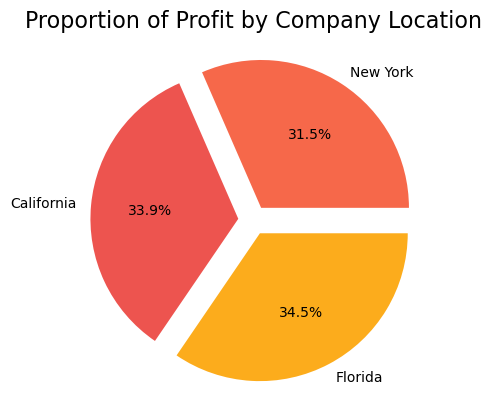

In [118]:
profit_data_group =profit_data.groupby("Company_Location").sum()
Locations = profit_data['Company_Location'].unique()
plot_location_pie(profit_data_group['Profit_Value'],Locations)
plt.savefig('Pie_Plot.png')

__Insights:__
	The pie plot illustrates the profit share for different company locations like California, Florida & New York.	It is shown that all percentage is almost similar for all locations whereas slightly maximum for Florida & New York have minimum profit share. Based on this representation, I can say there is no any significant impact of location on profit.


__Conclusion:__

To sum up, I would say if we can invest more on research & development we can have more profitable businessAlso profit percentage among different state are almost same
